**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [725]:
import pandas as pd
import numpy as np
import scipy as scipy
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# import data 2C_weka.csv for 2 Class Classifcation.


In [726]:
df_2=pd.read_csv("2Classdata.csv")
df_2

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

Head of Dataset

In [727]:
df_2.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


Tail of Dataset

In [728]:
df_2.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [729]:
df_2.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


Find Missing Values

In [730]:
df_2.isna().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

Unique values of class

In [731]:
df_2['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

Distribution of class values

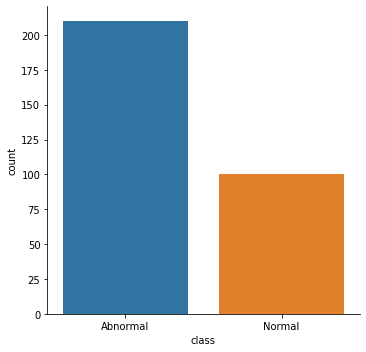

In [732]:
sns.catplot(x='class',kind='count',data=df_2)

Distribution of Other Attributes

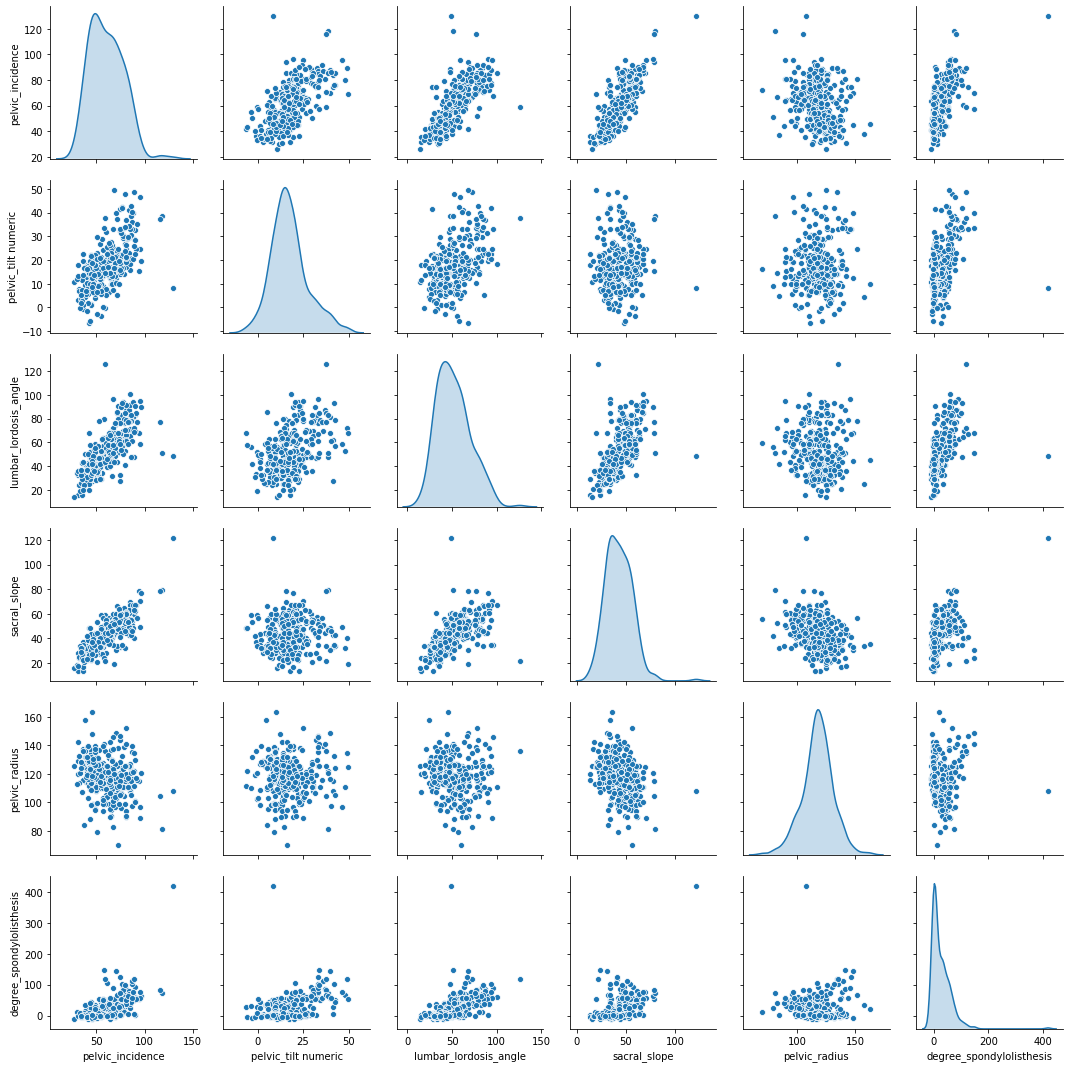

In [733]:
sns.pairplot(df_2,diag_kind='kde')
#Distribution of one particular Attribute is seen in the diagonal

Alternatively, each attribute can also be plotted as below

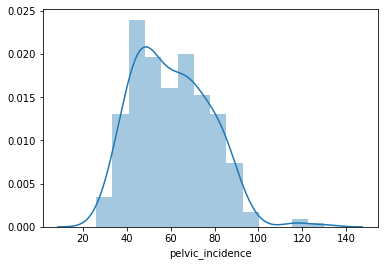

In [734]:
sns.distplot(df_2['pelvic_incidence'])

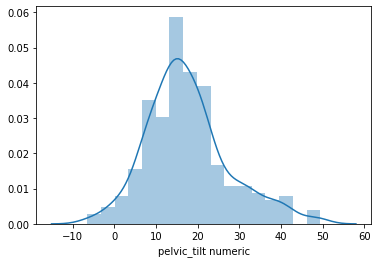

In [735]:
sns.distplot(df_2['pelvic_tilt numeric'])

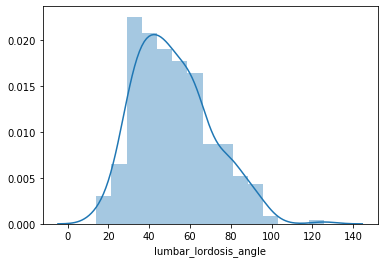

In [736]:
sns.distplot(df_2['lumbar_lordosis_angle'])

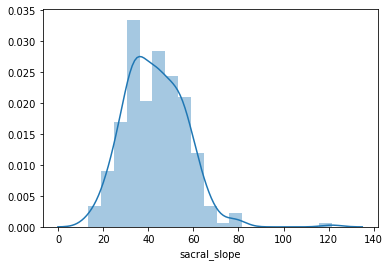

In [737]:
sns.distplot(df_2['sacral_slope'])

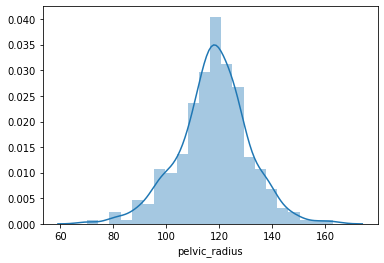

In [738]:
sns.distplot(df_2['pelvic_radius'])

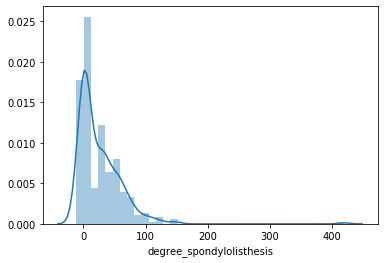

In [739]:
sns.distplot(df_2['degree_spondylolisthesis'])

Datatype information about the dataset

In [740]:
df_2.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

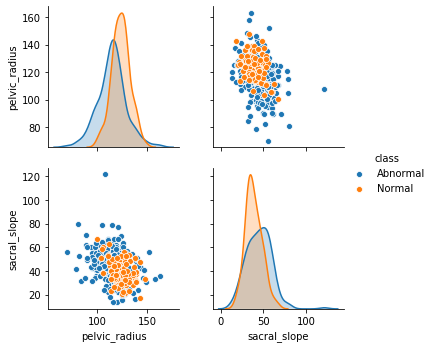

In [741]:
sns.pairplot(data=df_2,vars=['pelvic_radius','sacral_slope'],hue='class')

# Encode the Class variable to integer.

In [742]:
from sklearn import preprocessing
encoder=preprocessing.LabelEncoder()
encoder.fit(df_2["class"])
df_2["class"]=encoder.transform(df_2["class"])
df_2["class"]

0      0
1      0
2      0
3      0
4      0
      ..
305    1
306    1
307    1
308    1
309    1
Name: class, Length: 310, dtype: int32

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [743]:
X=df_2.drop(columns=['class'])
X

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


In [744]:
Y=df_2['class']
Y

0      0
1      0
2      0
3      0
4      0
      ..
305    1
306    1
307    1
308    1
309    1
Name: class, Length: 310, dtype: int32

# Normalize your Data (X) to get values between 0 to 1.

In [745]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

In [746]:
X

array([[0.35568788, 0.51989984, 0.22917997, 0.2508573 , 0.30746116,
        0.02514839],
       [0.12450104, 0.2967831 , 0.09857833, 0.14462935, 0.47664891,
        0.03636497],
       [0.41166648, 0.51393229, 0.32299466, 0.30766054, 0.38609692,
        0.0175229 ],
       ...,
       [0.34043781, 0.52244298, 0.28789745, 0.23490726, 0.59779618,
        0.01943732],
       [0.18425678, 0.27235174, 0.24684569, 0.21462279, 0.52117504,
        0.02624045],
       [0.07420202, 0.20770855, 0.20261992, 0.14251659, 0.57924032,
        0.02527676]])

# Split the dat as train and test with a ratio of 70:30.

In [747]:
from sklearn.model_selection import train_test_split

In [760]:
X_train, X_test, y_train, y_test =train_test_split(X,Y,train_size=0.7,test_size=0.3,shuffle=True)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [761]:
from sklearn.neighbors import KNeighborsClassifier

In [762]:
n=[3,5,7,9]
for k in n:
    knn=KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    print('for k = ',k,":",y_pred)



for k =  3 : [0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0
 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1
 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0]
for k =  5 : [0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0
 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1
 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0]
for k =  7 : [0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0
 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1
 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0]
for k =  9 : [0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1
 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0]


# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [763]:
for k in n:
    knn=KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    print('for k = ',k,': Score is =',knn.score(X_test,y_test))

for k =  3 : Score is = 0.7956989247311828
for k =  5 : Score is = 0.8172043010752689
for k =  7 : Score is = 0.8602150537634409
for k =  9 : Score is = 0.8279569892473119


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

From the above score for all values of k, we get the best score for k=7

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [764]:
df_3=pd.read_csv("3Classdata.csv")
df_3

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


Head of Dataset

In [765]:
df_3.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


Tail of Dataset

In [766]:
df_3.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [767]:
df_3.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


Find Missing Values

In [768]:
df_3.isna().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

Unique class values

In [769]:
df_3['class'].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

Distribution of Class Values

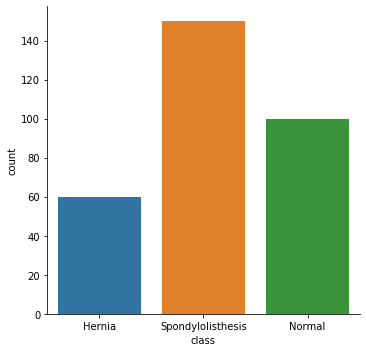

In [770]:
sns.catplot(x='class',data=df_3,kind='count')

Distribution of other Attributes

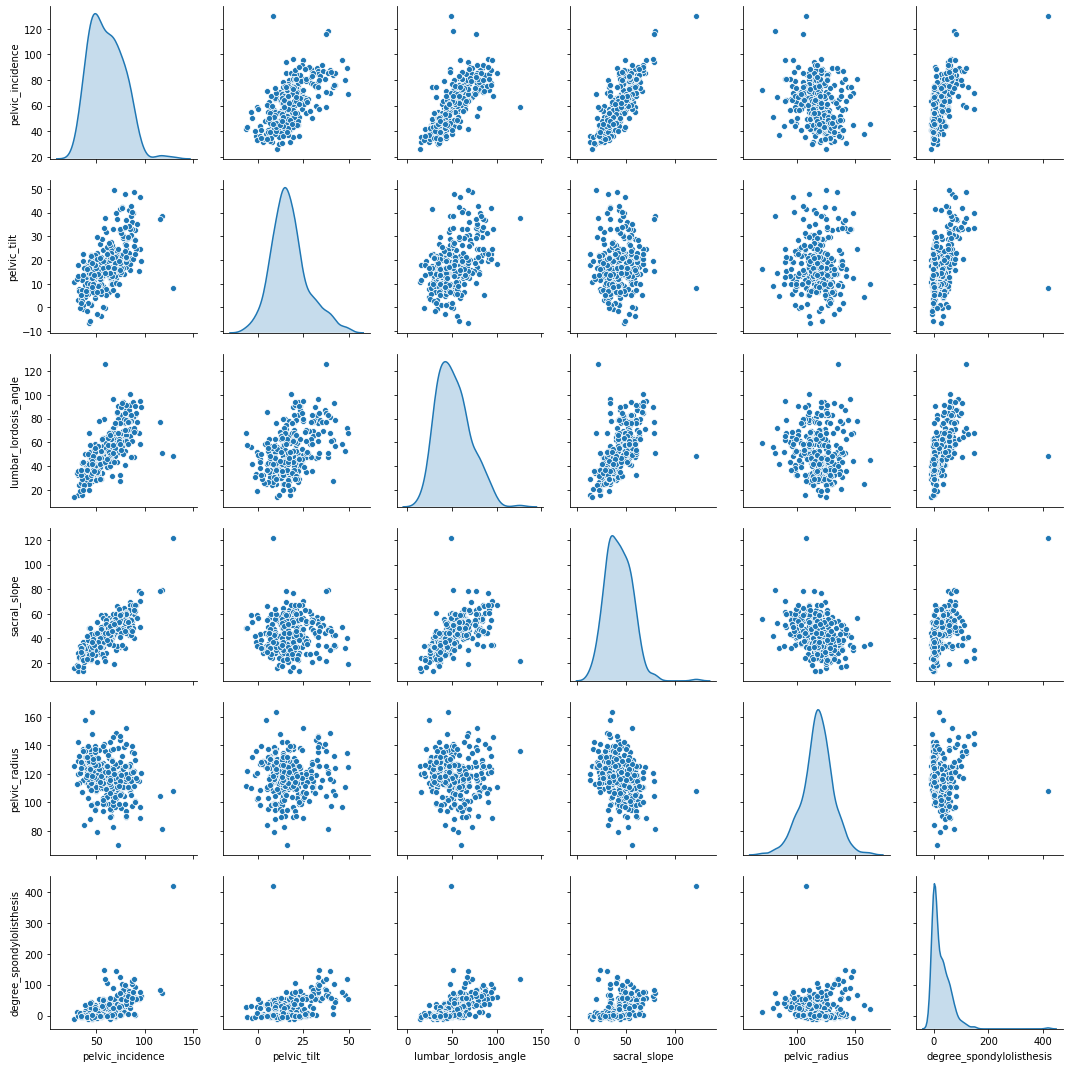

In [771]:
sns.pairplot(df_3,diag_kind='kde')
#Distribution of one particular Attribute is seen in the diagonal

Alternatively, each attribute can also be plotted as below

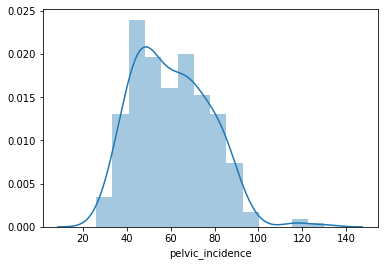

In [772]:
sns.distplot(df_3['pelvic_incidence'])

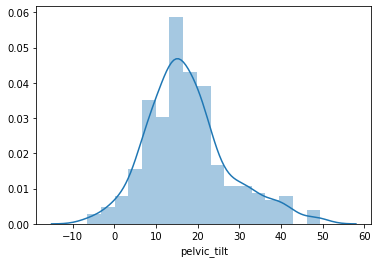

In [773]:
sns.distplot(df_3['pelvic_tilt'])

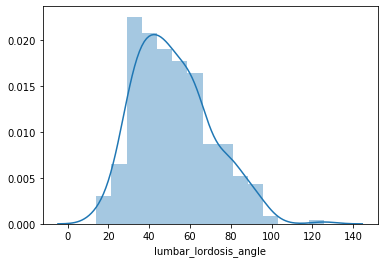

In [774]:
sns.distplot(df_3['lumbar_lordosis_angle'])

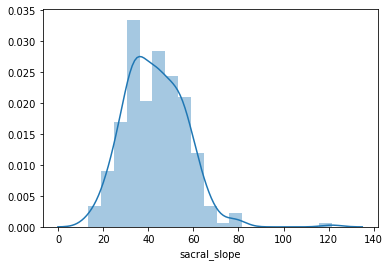

In [775]:
sns.distplot(df_3['sacral_slope'])

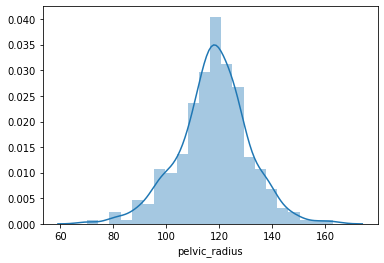

In [776]:
sns.distplot(df_3['pelvic_radius'])

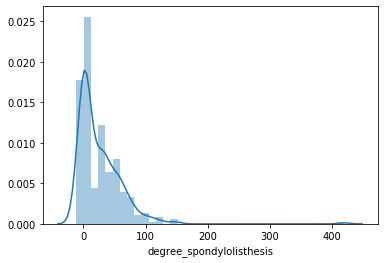

In [777]:
sns.distplot(df_3['degree_spondylolisthesis'])

In [778]:
df_3.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

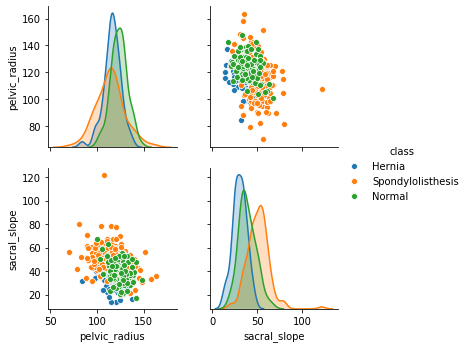

In [779]:
sns.pairplot(data=df_3,vars=['pelvic_radius','sacral_slope'],hue='class')

# Encode the Class variable to integer.

In [780]:
from sklearn.preprocessing import LabelEncoder
encoder=preprocessing.LabelEncoder()
encoder.fit(df_3['class'])
df_3['class']=encoder.transform(df_3['class'])
df_3['class']

0      0
1      0
2      0
3      0
4      0
      ..
305    1
306    1
307    1
308    1
309    1
Name: class, Length: 310, dtype: int32

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [781]:
X=df_3.drop(columns='class')
X

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


In [782]:
Y=df_3['class']
Y

0      0
1      0
2      0
3      0
4      0
      ..
305    1
306    1
307    1
308    1
309    1
Name: class, Length: 310, dtype: int32

# Normalize your Data (X) to get values between 0 to 1.

In [783]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit(X)
scaler.transform(X)

array([[0.35568788, 0.51989984, 0.22917997, 0.2508573 , 0.30746116,
        0.02514839],
       [0.12450104, 0.2967831 , 0.09857833, 0.14462935, 0.47664891,
        0.03636497],
       [0.41166648, 0.51393229, 0.32299466, 0.30766054, 0.38609692,
        0.0175229 ],
       ...,
       [0.34043781, 0.52244298, 0.28789745, 0.23490726, 0.59779618,
        0.01943732],
       [0.18425678, 0.27235174, 0.24684569, 0.21462279, 0.52117504,
        0.02624045],
       [0.07420202, 0.20770855, 0.20261992, 0.14251659, 0.57924032,
        0.02527676]])

# Split the dat as train and test with a ratio of 70:30.

In [787]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.70,test_size=0.30,shuffle=True)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [788]:
from sklearn.neighbors import KNeighborsClassifier
n=[3,5,7,9]
for k in n:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    print("for k =",k,": ",knn.predict(X_test))

for k = 3 :  [1 2 1 2 2 2 1 1 0 1 0 0 2 2 0 2 2 0 2 1 2 2 2 2 2 0 2 1 0 2 0 2 1 2 1 0 2
 2 2 2 2 1 0 0 0 2 2 1 0 1 1 1 0 2 1 2 1 2 1 2 2 2 0 2 1 1 2 0 1 1 2 1 2 0
 2 0 2 1 2 1 2 1 1 2 0 2 1 1 1 0 1 2 2]
for k = 5 :  [1 2 1 2 2 2 1 1 0 1 1 0 2 2 0 2 2 0 2 1 2 2 2 2 2 0 2 1 0 2 0 2 1 2 1 0 2
 2 2 2 2 1 0 1 0 2 2 1 1 1 0 1 0 2 1 2 1 2 1 2 2 2 0 2 1 1 2 0 1 1 2 0 2 0
 2 1 2 1 2 1 2 1 1 2 0 2 1 1 1 0 1 2 2]
for k = 7 :  [1 2 1 2 2 2 1 1 0 1 1 0 2 2 0 2 2 0 2 1 2 2 2 2 2 0 2 1 0 2 0 2 1 2 1 0 2
 2 2 2 2 1 0 1 0 2 2 1 1 1 2 1 0 2 1 2 1 2 1 2 2 2 0 2 1 1 2 0 1 1 2 2 2 0
 2 1 2 1 2 1 2 1 1 2 0 2 1 1 1 0 1 2 2]
for k = 9 :  [1 2 1 2 2 2 1 1 0 1 1 0 2 2 0 2 2 0 2 1 2 2 2 2 2 0 2 1 0 2 0 2 1 2 1 0 2
 2 2 2 2 1 0 1 0 2 2 1 1 1 1 1 0 2 1 2 2 2 1 2 2 2 0 2 1 1 2 0 1 1 2 2 2 0
 2 1 2 1 2 1 2 1 1 2 0 2 1 1 1 0 1 2 2]


# Calculate the performance score of of your classification on test dataset.¶
Hint- You can use knn.score( ) function.

In [789]:
for k in n:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    knn.predict(X_test)
    print("for k =",k,": Score is =",knn.score(X_test,y_test))

for k = 3 : Score is = 0.8817204301075269
for k = 5 : Score is = 0.8602150537634409
for k = 7 : Score is = 0.8602150537634409
for k = 9 : Score is = 0.8602150537634409


# What is the best K value for your classifcation?

From the above scores, it is clear that best score is for k=3.